# Image -> character

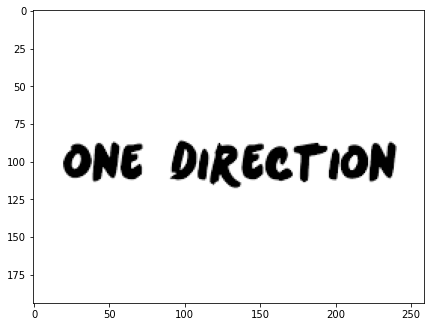


------------------Text retrived from the image-----------------

ONE DIRECTION



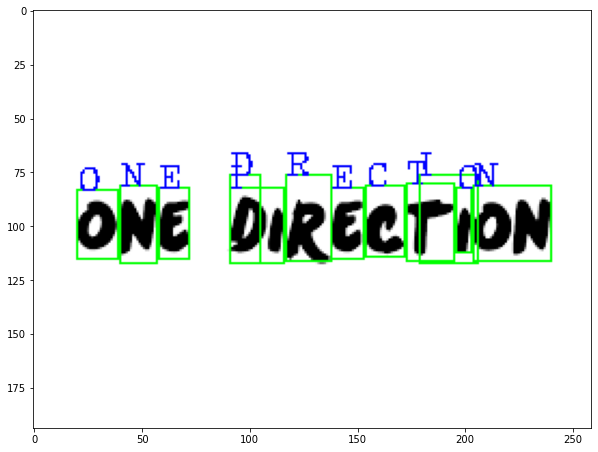

In [48]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# This is the path of the tesseract command. bcoz pytessarct is just the google api wrapper for the tessaract in python.
path = "/usr/bin/tesseract"

# setting the path for the pytesseract to find the commands of tesseract. so pytesseract can use it.
pytesseract.pytesseract.tesseract_cmd = path

# Readinf the image from the directory
img = cv2.imread('images/one_text.png')

# This is our image 
plt.figure(figsize = (7, 7))
plt.imshow(img, cmap = 'gray')
plt.show()

# converting the image into string
text = pytesseract.image_to_string(img)

print()
print("------------------Text retrived from the image-----------------")
print()
print(text)

# finding a bounding box co-ordinate for each object in the image 
bounding_boxes = pytesseract.image_to_boxes(img)

# Here first two values for x, y which is the center of the object in the bounding box, 3,4 - w, h of the bounding boxes

img_w, img_h, _ = img.shape

# Detecting the characters and drawing bounding boxes in given image

for box in bounding_boxes.splitlines():
    box = box.split(' ')
    
    # (x, y) center of the bounding box and (w, h) width and height of the bounding box
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    
    # Using this co-ordinates, we gonna draw bounding box using cv2.rectangle method
    # Third and fourth parameter of the rectangle is color and the thinkness of the bounding box
    cv2.rectangle(img, (x, y), (w, h + 10), (0, 255, 0), 1)
    cv2.putText(img, box[0], (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)

plt.figure(figsize = (10, 10))
plt.imshow(img)
    

# Image -> text -> audio

In [13]:
import gtts

gtts_obj = gtts.gTTS(text = text, lang = 'en', slow = False)

gtts_obj.save('new.mp3')

In [14]:
# pytessarct method to_text --> gives the character, to_data ---> gives the words 

# Image -> Words

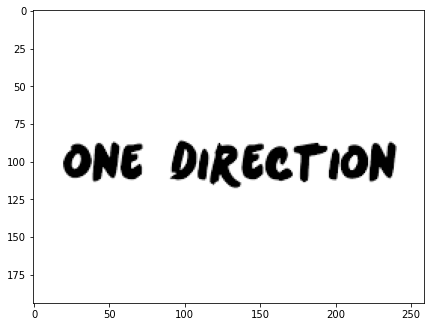

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	259	194	-1	
2	1	1	0	0	0	20	87	220	31	-1	
3	1	1	1	0	0	20	87	220	31	-1	
4	1	1	1	1	0	20	87	220	31	-1	
5	1	1	1	1	1	20	87	52	26	96	ONE
5	1	1	1	1	2	91	87	149	31	96	DIRECTION



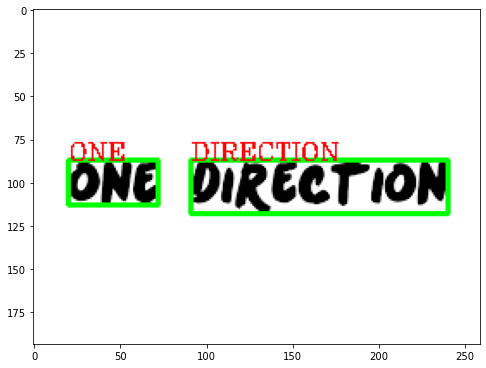

In [58]:
def run(img_path) :
    
    # This is the path of the tesseract command. bcoz pytessarct is just the google api wrapper for the tessaract in python.
    path = "/usr/bin/tesseract"

    # setting the path for the pytesseract to find the commands of tesseract. so pytesseract can use it.
    pytesseract.pytesseract.tesseract_cmd = path
    
    # Readinf the image from the directory
    img = cv2.imread(img_path)
      
    # This is our image 
    plt.figure(figsize = (7, 7))
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
    words = pytesseract.image_to_data(img)
    
    print(words)
    
    for count, box in enumerate(words.splitlines()) :
        if count != 0 :
            box = box.split()
            #print(box)
            
            if len(box) == 12 :
              #  print("hi")
                
            # (x, y) center of the bounding box and (w, h) width and height of the bounding box
                x, y, w, h = int(box[6]), int(box[7]), int(box[8]), int(box[9])

                # Using this co-ordinates, we gonna draw bounding box using cv2.rectangle method
                # Third and fourth parameter of the rectangle is color and the thinkness of the bounding box
                img = cv2.rectangle(img, (x, y), (w + x, h + y), (0, 255, 0), 2)
               # print(img)
                img = cv2.putText(img, box[11], (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 2), 1)
    
    plt.figure(figsize = (8, 8))
    plt.imshow(img)        
    plt.show()
        
    
run('images/one_text.png')
    

# Image -> Number

In [ ]:
# Below function only returns the number from the image, even if it has a text in it
# this can be done by setting a value for the parameter config in the method image_to_data()

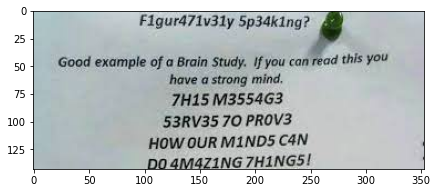

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	353	143	-1	
2	1	1	0	0	0	97	4	152	14	-1	
3	1	1	1	0	0	97	4	152	14	-1	
4	1	1	1	1	0	97	4	152	14	-1	
5	1	1	1	1	1	97	4	152	14	0	4713153412
2	1	2	0	0	0	23	39	297	30	-1	
3	1	2	1	0	0	123	57	100	12	-1	
4	1	2	1	1	0	123	57	100	12	-1	
5	1	2	1	1	1	198	57	25	9	0	4
2	1	3	0	0	0	104	74	147	69	-1	
3	1	3	1	0	0	104	74	147	69	-1	
4	1	3	1	1	0	126	74	100	12	-1	
5	1	3	1	1	1	126	74	100	12	0	715355463
4	1	3	1	2	0	117	93	117	13	-1	
5	1	3	1	2	1	117	93	117	13	0	53357003
4	1	3	1	3	0	105	111	143	14	-1	
5	1	3	1	3	1	105	111	143	14	0	0154
4	1	3	1	4	0	104	129	147	14	-1	
5	1	3	1	4	1	104	129	147	14	0	104471715



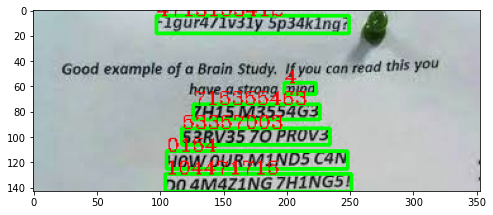

In [60]:

def run(img_path) :
    
    # This is the path of the tesseract command. bcoz pytessarct is just the google api wrapper for the tessaract in python.
    path = "/usr/bin/tesseract"

    # setting the path for the pytesseract to find the commands of tesseract. so pytesseract can use it.
    pytesseract.pytesseract.tesseract_cmd = path
    
    # Readinf the image from the directory
    img = cv2.imread(img_path)
      
    # This is our image 
    plt.figure(figsize = (7, 7))
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
    config = r'digits --oem 1 --psm 7 -c tessedit_char_whitelist=0123456789'
    words = pytesseract.image_to_data(img, config = config)
    
    print(words)
    
    for count, box in enumerate(words.splitlines()) :
        if count != 0 :
            box = box.split()
            #print(box)
            
            if len(box) == 12 :
              #  print("hi")
                
            # (x, y) center of the bounding box and (w, h) width and height of the bounding box
                x, y, w, h = int(box[6]), int(box[7]), int(box[8]), int(box[9])

                # Using this co-ordinates, we gonna draw bounding box using cv2.rectangle method
                # Third and fourth parameter of the rectangle is color and the thinkness of the bounding box
                img = cv2.rectangle(img, (x, y), (w + x, h + y), (0, 255, 0), 2)
               # print(img)
                img = cv2.putText(img, box[11], (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 2), 1)
    
    plt.figure(figsize = (8, 8))
    plt.imshow(img)        
    plt.show()
        
    
run('images/ocr_image.jpeg')
        